# Example 1: 2-spin exchange

In this example, we look at a simple case of a single spin with its chemical shift modulated by an exchange process. Then, we will see how its behavior changes as a function of correlation time and population

### Installs and Imports

In [1]:
#!!git clone https://github.com/alsinmr/pyRelaxSim.git
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub')
import pyRelaxSim as RS
import numpy as np
import matplotlib.pyplot as plt

## Build the spin system

For relaxation induced by exchange, we always build the spin system with at least two different sets of interactions. Not all interactions must change, but at least one interaction should be different– otherwise no relaxation will occure. Note that best-practice is to build the first spin-system, and copy it and only edit the parameters that are changed in the second spin-system.

pyRelaxSim takes the main experimental parameters (excepting rf fields) upon initialization of a spin-system, and then interactions are added afterwards.

In [2]:
ex0=RS.ExpSys(v0H=600,Nucs='13C')     #1-spin system at 600 MHz (14.1 T)
ex0.set_inter(Type='CS',i=0,ppm=0)    #Chemical shift for spin 0 at 0 ppm
ex1=ex0.copy()   #Copies the spin-system
ex1.set_inter(Type='CS',i=0,ppm=10)   #Change of chemical shift by 10 ppm (~1500 Hz)  

## Define Liouvillian, initial density operator, and detection operator

In [16]:
L=RS.Liouvillian((ex0,ex1)) #Liouvillian with both Hamiltonians
rho=RS.Rho(rho0='13Cx',detect='13Cp',L=L)   #Specify by Nucleus type and operator type

## Calculate Spectrum as Function of Correlation Time

In this case, there isn't really a sequence. We just start the magnetization on Sx, propagate it, and observe at each propagation step.

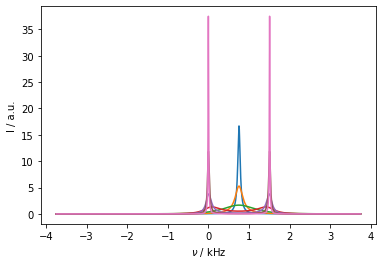

In [17]:
dt=1/1500/5   #Time step for propagator
tc0=np.logspace(-5,-2,7)  #Correlation time axis
ax=plt.figure().add_subplot(111)  #Axis for plotting results
for tc in tc0:
    L.kex=np.array([[-1/(2*tc),1/(2*tc)],[1/(2*tc),-1/(2*tc)]])
    U=L.U(t0=0,tf=dt)  #Propagator for a time step dt
    
    rho.clear()     #Clear all information out of rho
    rho.DetProp(U,n=10000)   #Propagate for 10000 time steps
    rho.plot(ax=ax,FT=True,imag=False)    #Plot FT of the results